# Regresión Lineal con scikit-learn. Introducción

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-whitegrid")

A continuación se crean 2 arreglos que corresponden al presupuesto y las ganancias (en millones de dólares) de 10 películas. El objetivo es hacer predicciones usando regresión lineal.

In [21]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [22]:
revenue = np.array([2.6, 19., 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [23]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


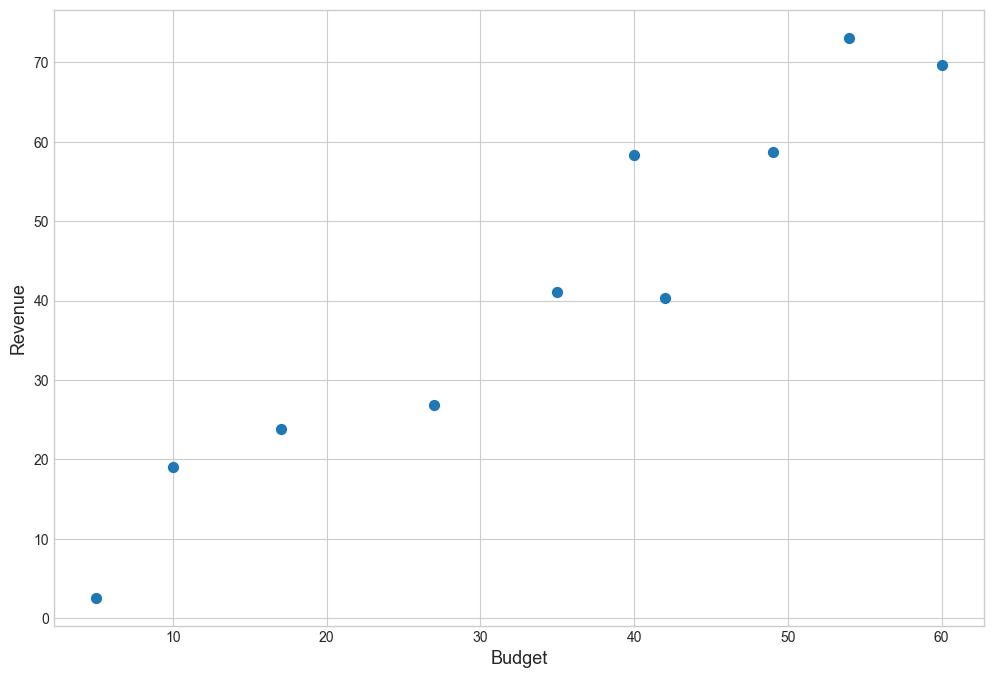

In [24]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression